## How to Train YOLOv8 Object Detection on a Custom Dataset

In [ ]:
!nvidia-smi

Sat Apr 13 19:31:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics==8.0.196

## Install YOLOv8

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.25.2>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.2.1+cu121>=1.8.0
torchvision         ✅ 0.17.1+cu121>=0.9.0
tqdm                ✅ 4.66.2>=4.64.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


## Train YOLOv8 Model on Custom Dataset

In [ ]:
!pip install roboflow

In [ ]:
# set up environment
import os
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="HpnyNsefK2BbhEa0vT3y")
project = rf.workspace("ods-bmzq2").project("pistol_knife")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/Pistol_Knife-1 in yolov8:: 100%|██████████| 2470/2470 [00:00<00:00, 5241.22it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/datasets/Pistol_Knife-1/data.yaml epochs=50 imgsz=340

100% 6.23M/6.23M [00:00<00:00, 307MB/s]
New https://pypi.org/project/ultralytics/8.1.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/Pistol_Knife-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=340, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=Fal

In [9]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

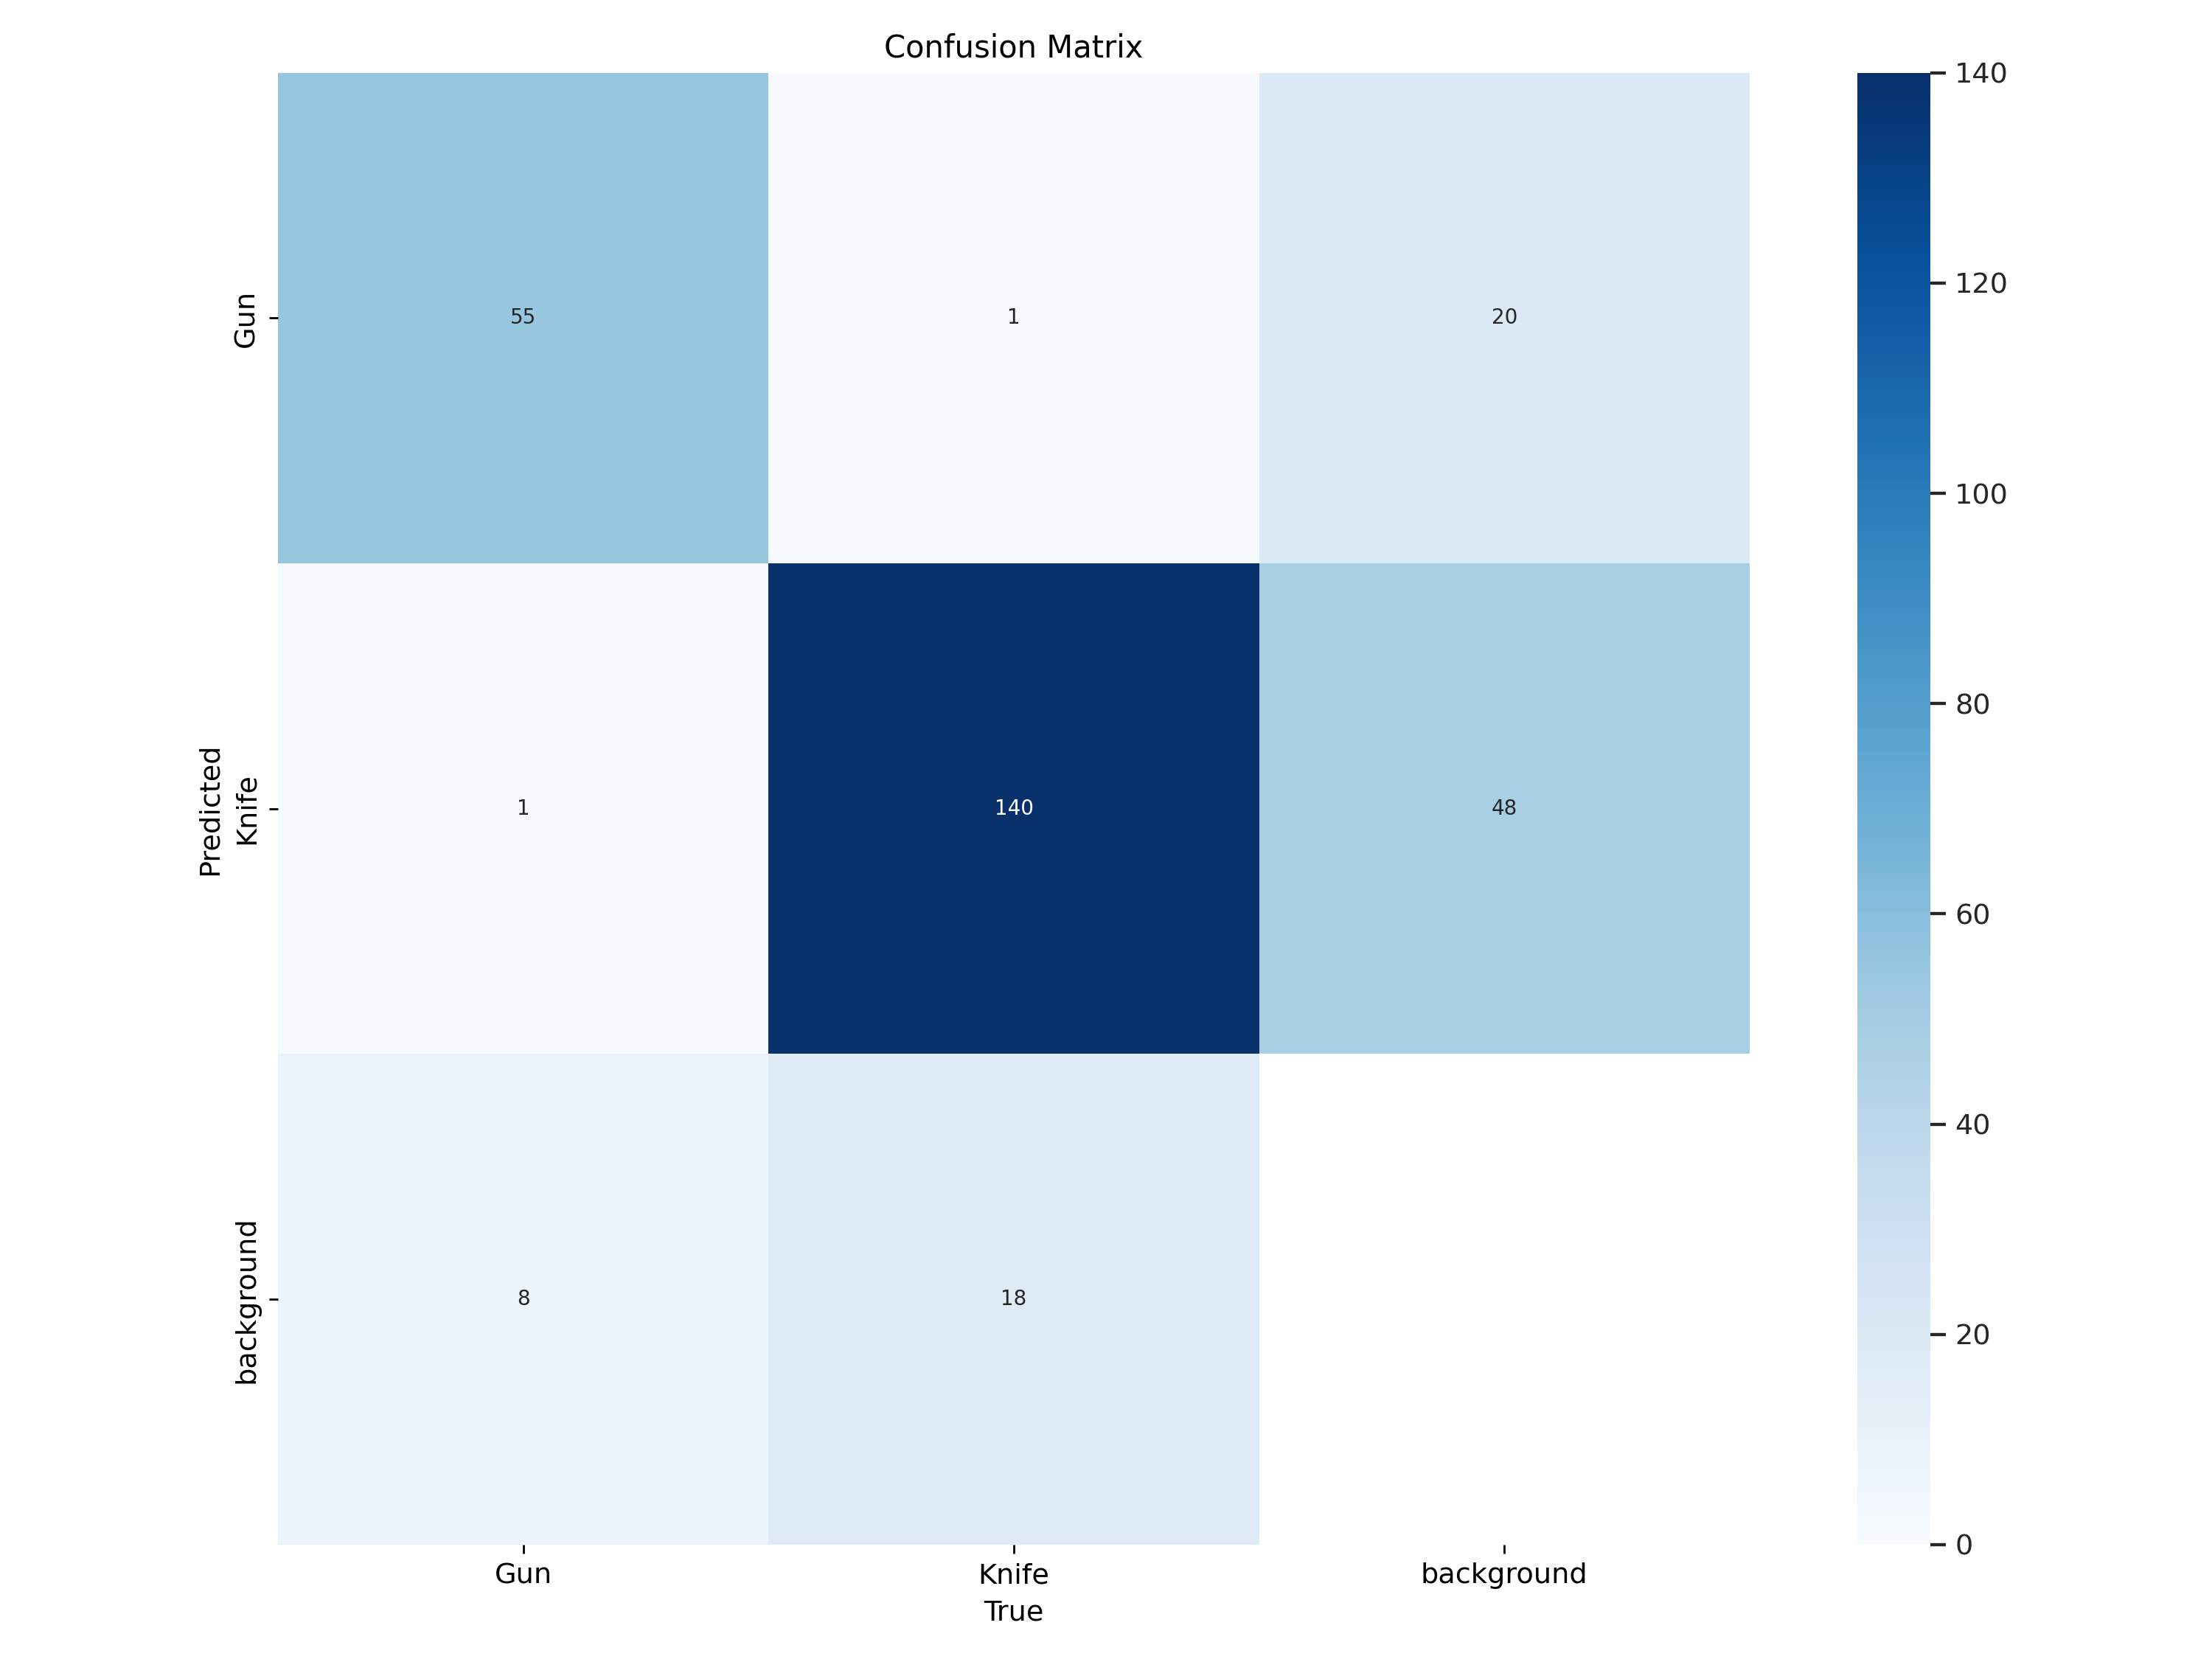

In [10]:
from IPython.display import display, Image
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

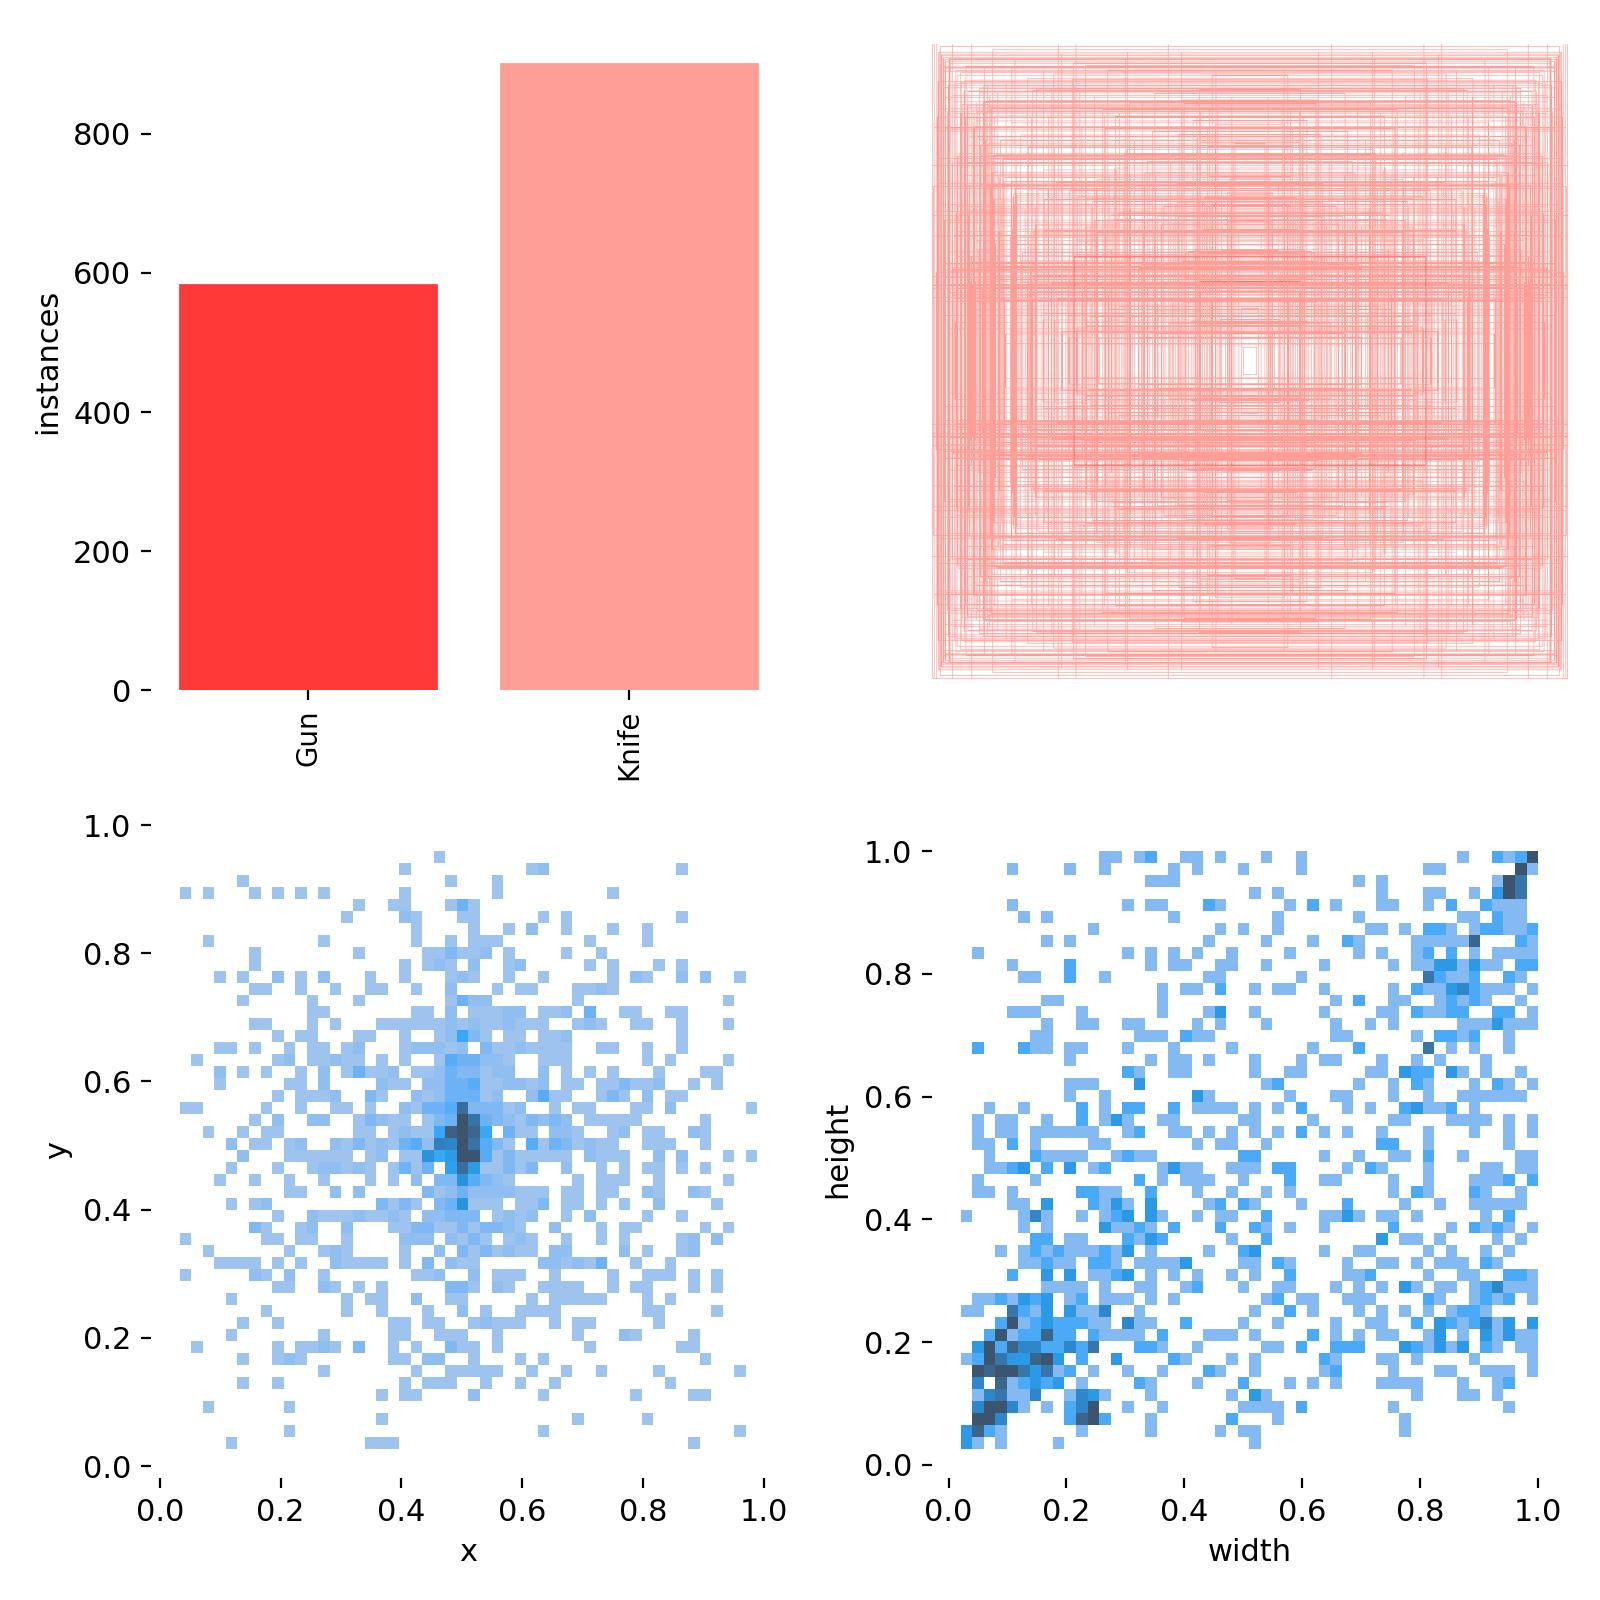

In [11]:
Image(filename=f'/content/runs/detect/train/labels.jpg', width=600)

In [13]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/Pistol_Knife-1/valid/labels.cache... 160 images, 0 backgrounds, 0 corrupt: 100% 160/160 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:04<00:00,  2.47it/s]
                   all        160        223      0.853      0.794       0.86      0.563
                   Gun        160         64      0.926      0.777      0.844      0.461
                 Knife        160        159      0.781      0.811      0.876      0.664
Speed: 0.2ms preprocess, 3.5ms inference, 0.0ms loss, 6.1ms postprocess

In [14]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.2 source={dataset.location}/test/images save_txt=true save_conf=true


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/86 /content/datasets/Pistol_Knife-1/test/images/0565bcccb1266f62_jpg.rf.ae07a5a856c9116ec954ead0ad9eeb52.jpg: 352x352 3 Knifes, 10.8ms
image 2/86 /content/datasets/Pistol_Knife-1/test/images/0714ba87e14391c7_jpg.rf.ce73f6e52a0d44448582f29c6e1f934f.jpg: 352x352 1 Knife, 9.5ms
image 3/86 /content/datasets/Pistol_Knife-1/test/images/085622859f9b4eb2_jpg.rf.ddb939ea08ab7b7e32e7f30132251b57.jpg: 352x352 1 Knife, 7.2ms
image 4/86 /content/datasets/Pistol_Knife-1/test/images/0d854d62b14b9b92_jpg.rf.fde733c790c78fd5ad2a159e0ed683cf.jpg: 352x352 2 Knifes, 7.1ms
image 5/86 /content/datasets/Pistol_Knife-1/test/images/14c8c84d0892ce6f_jpg.rf.06f79d882fadf44d6cd5b27ab4f5f7f2.jpg: 352x352 1 Knife, 7.2ms
image 6/86 /content/datasets/Pistol_Knife-1/test/images/15b039d70c1b315a_jpg.rf.e1

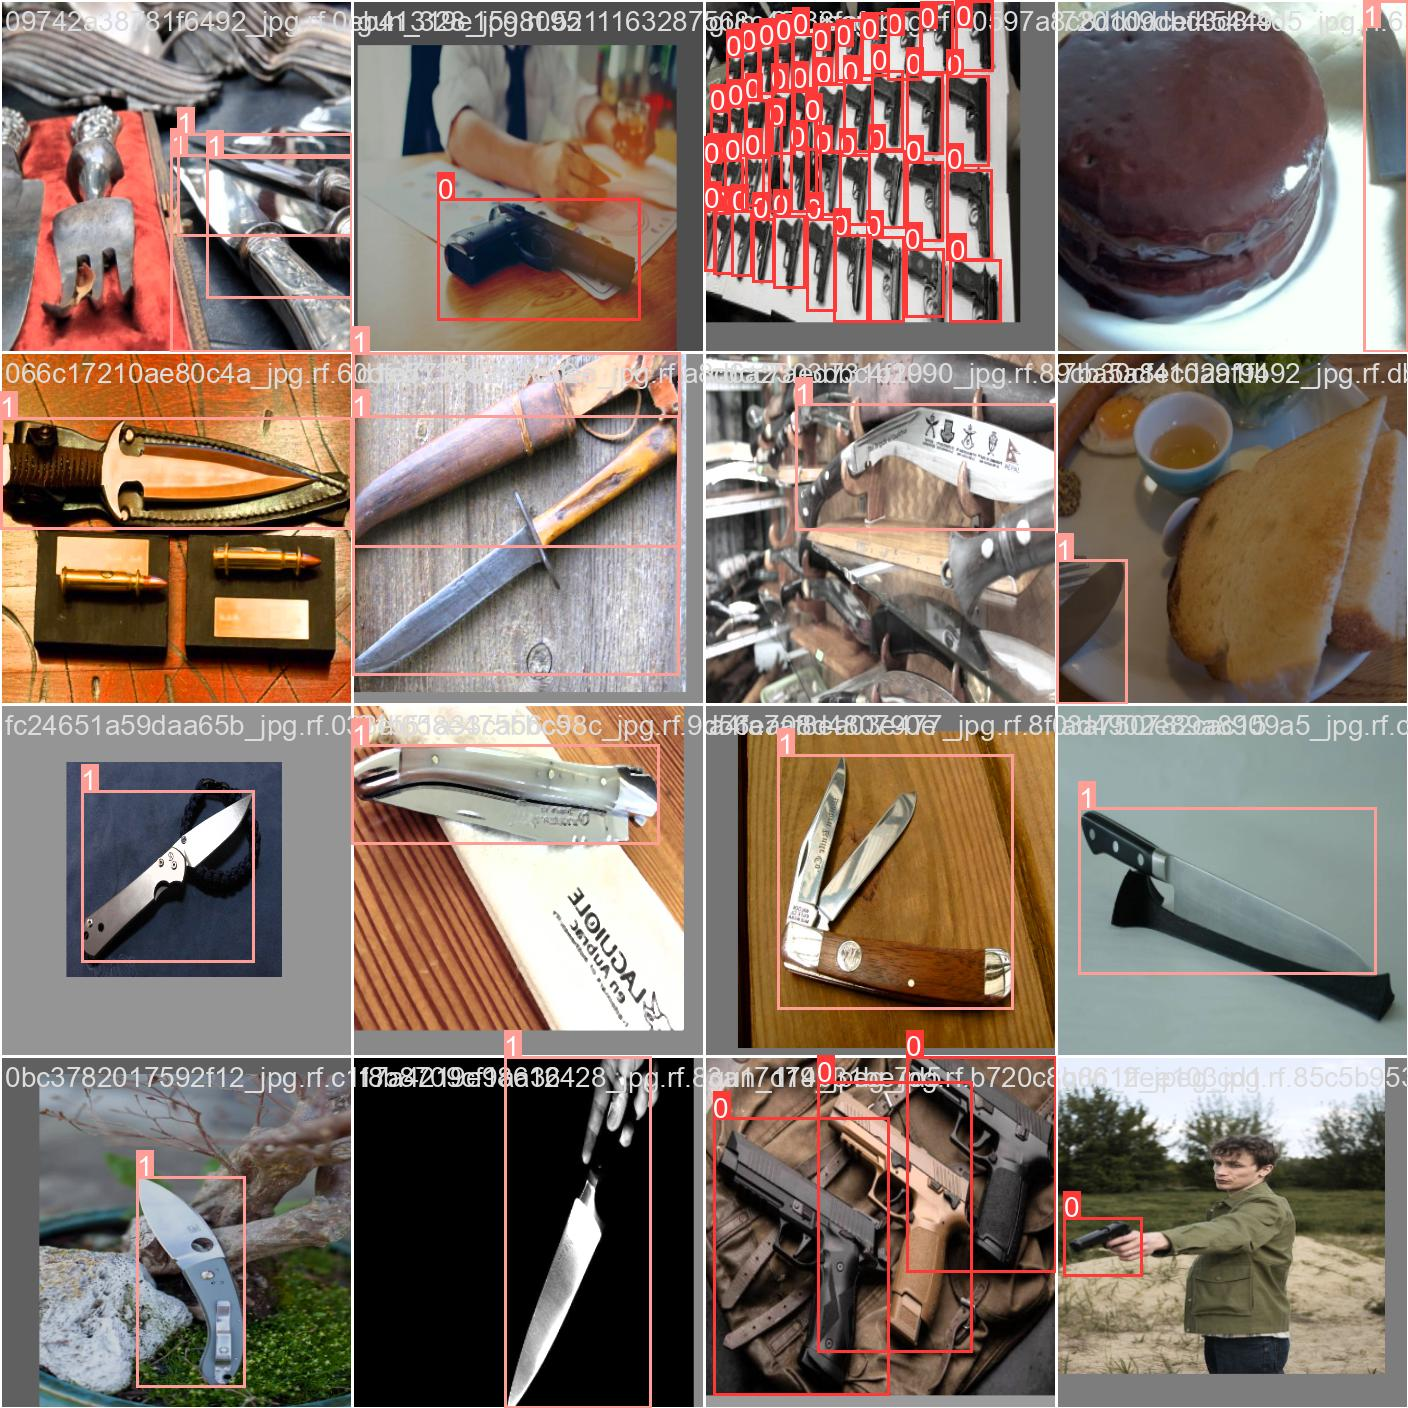

In [16]:
Image(filename=f'/content/runs/detect/train/train_batch2480.jpg', width=600)

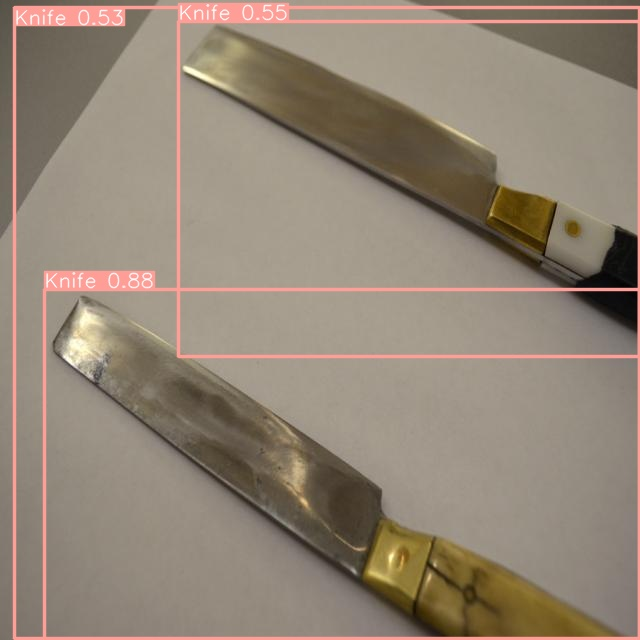

In [17]:
Image(filename=f'/content/runs/detect/predict/0565bcccb1266f62_jpg.rf.ae07a5a856c9116ec954ead0ad9eeb52.jpg', width=600)

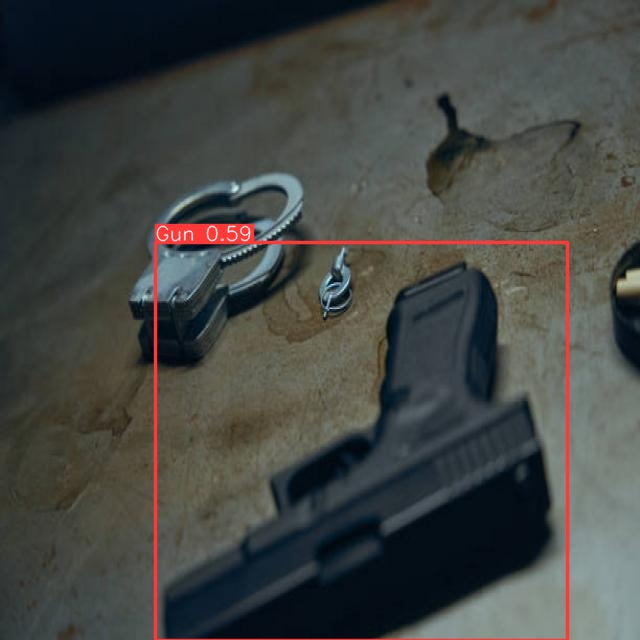

In [20]:
Image(filename=f'/content/runs/detect/predict/gun_208_jpg.rf.3335da6ad0b1e5bd7123ba8661dfe7a0.jpg', width=600)

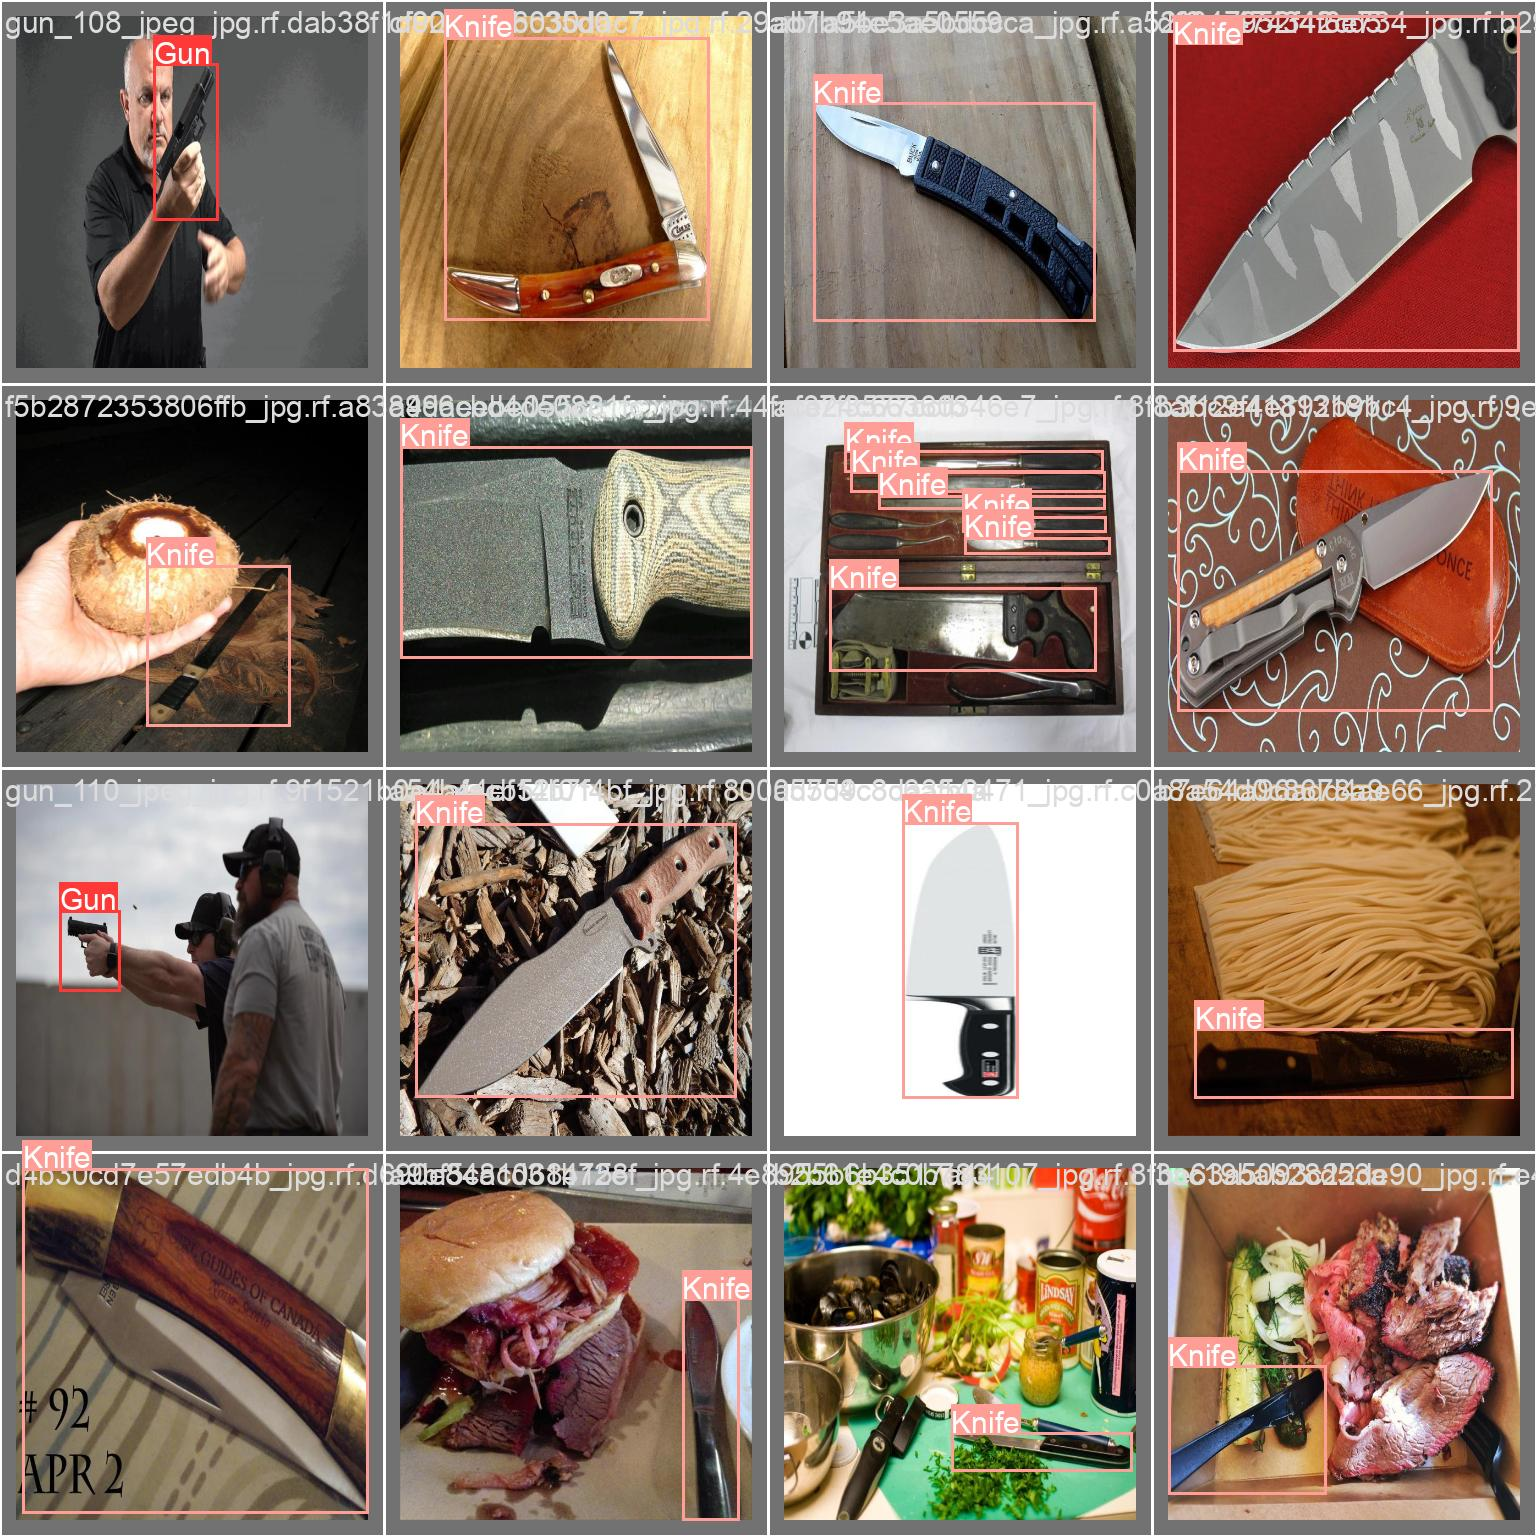

In [21]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/val/val_batch1_labels.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

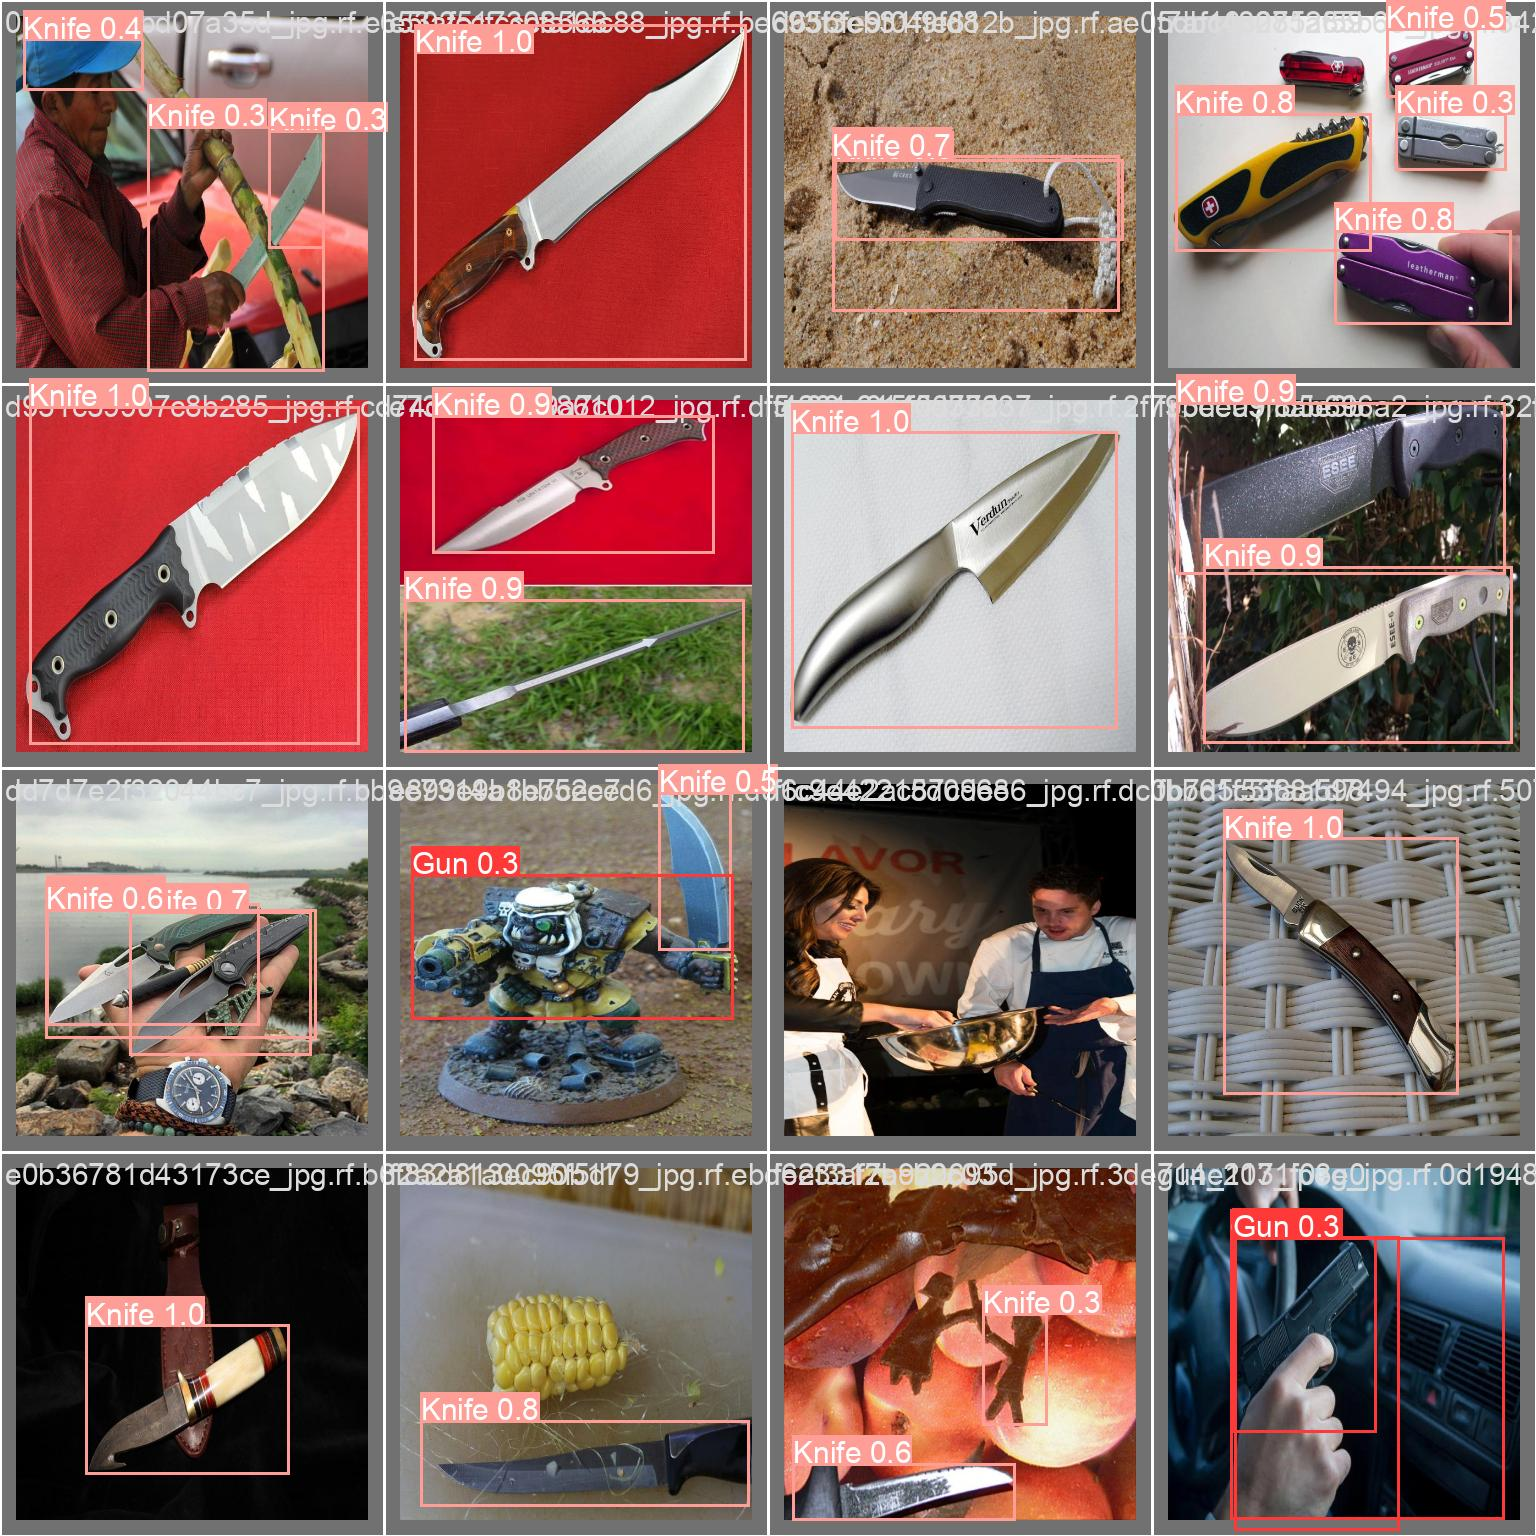

In [23]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/train/val_batch0_pred.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

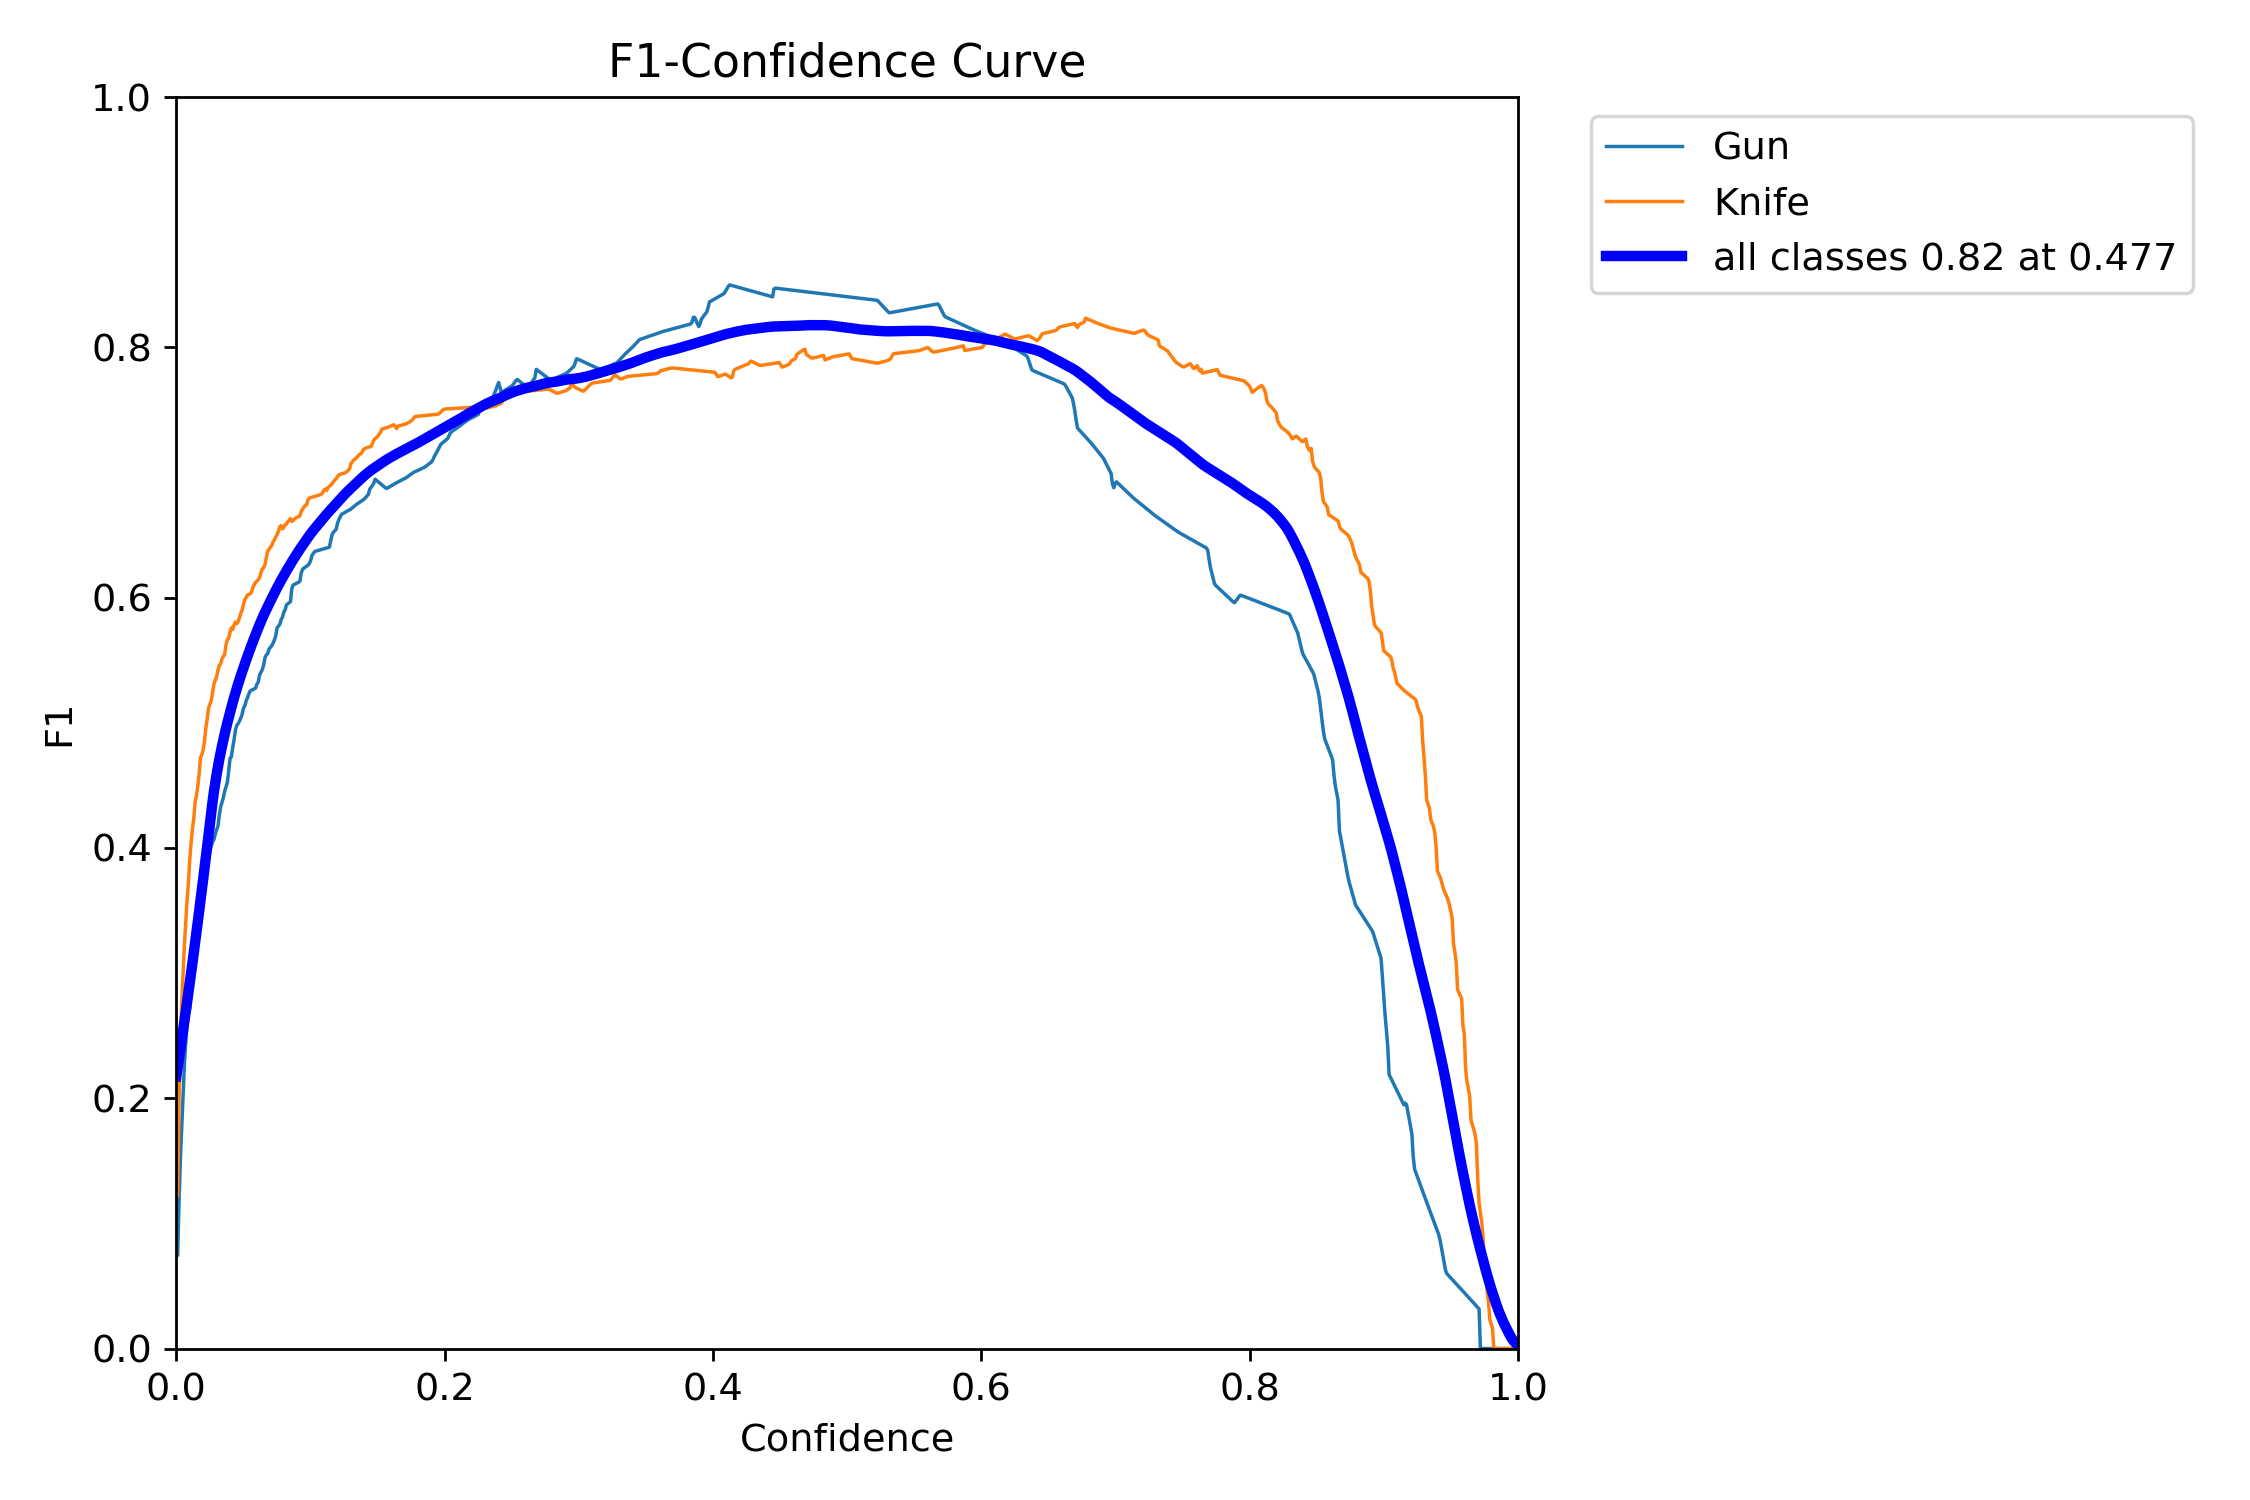

In [24]:
Image(filename=f'/content/runs/detect/train/F1_curve.png', width=600)

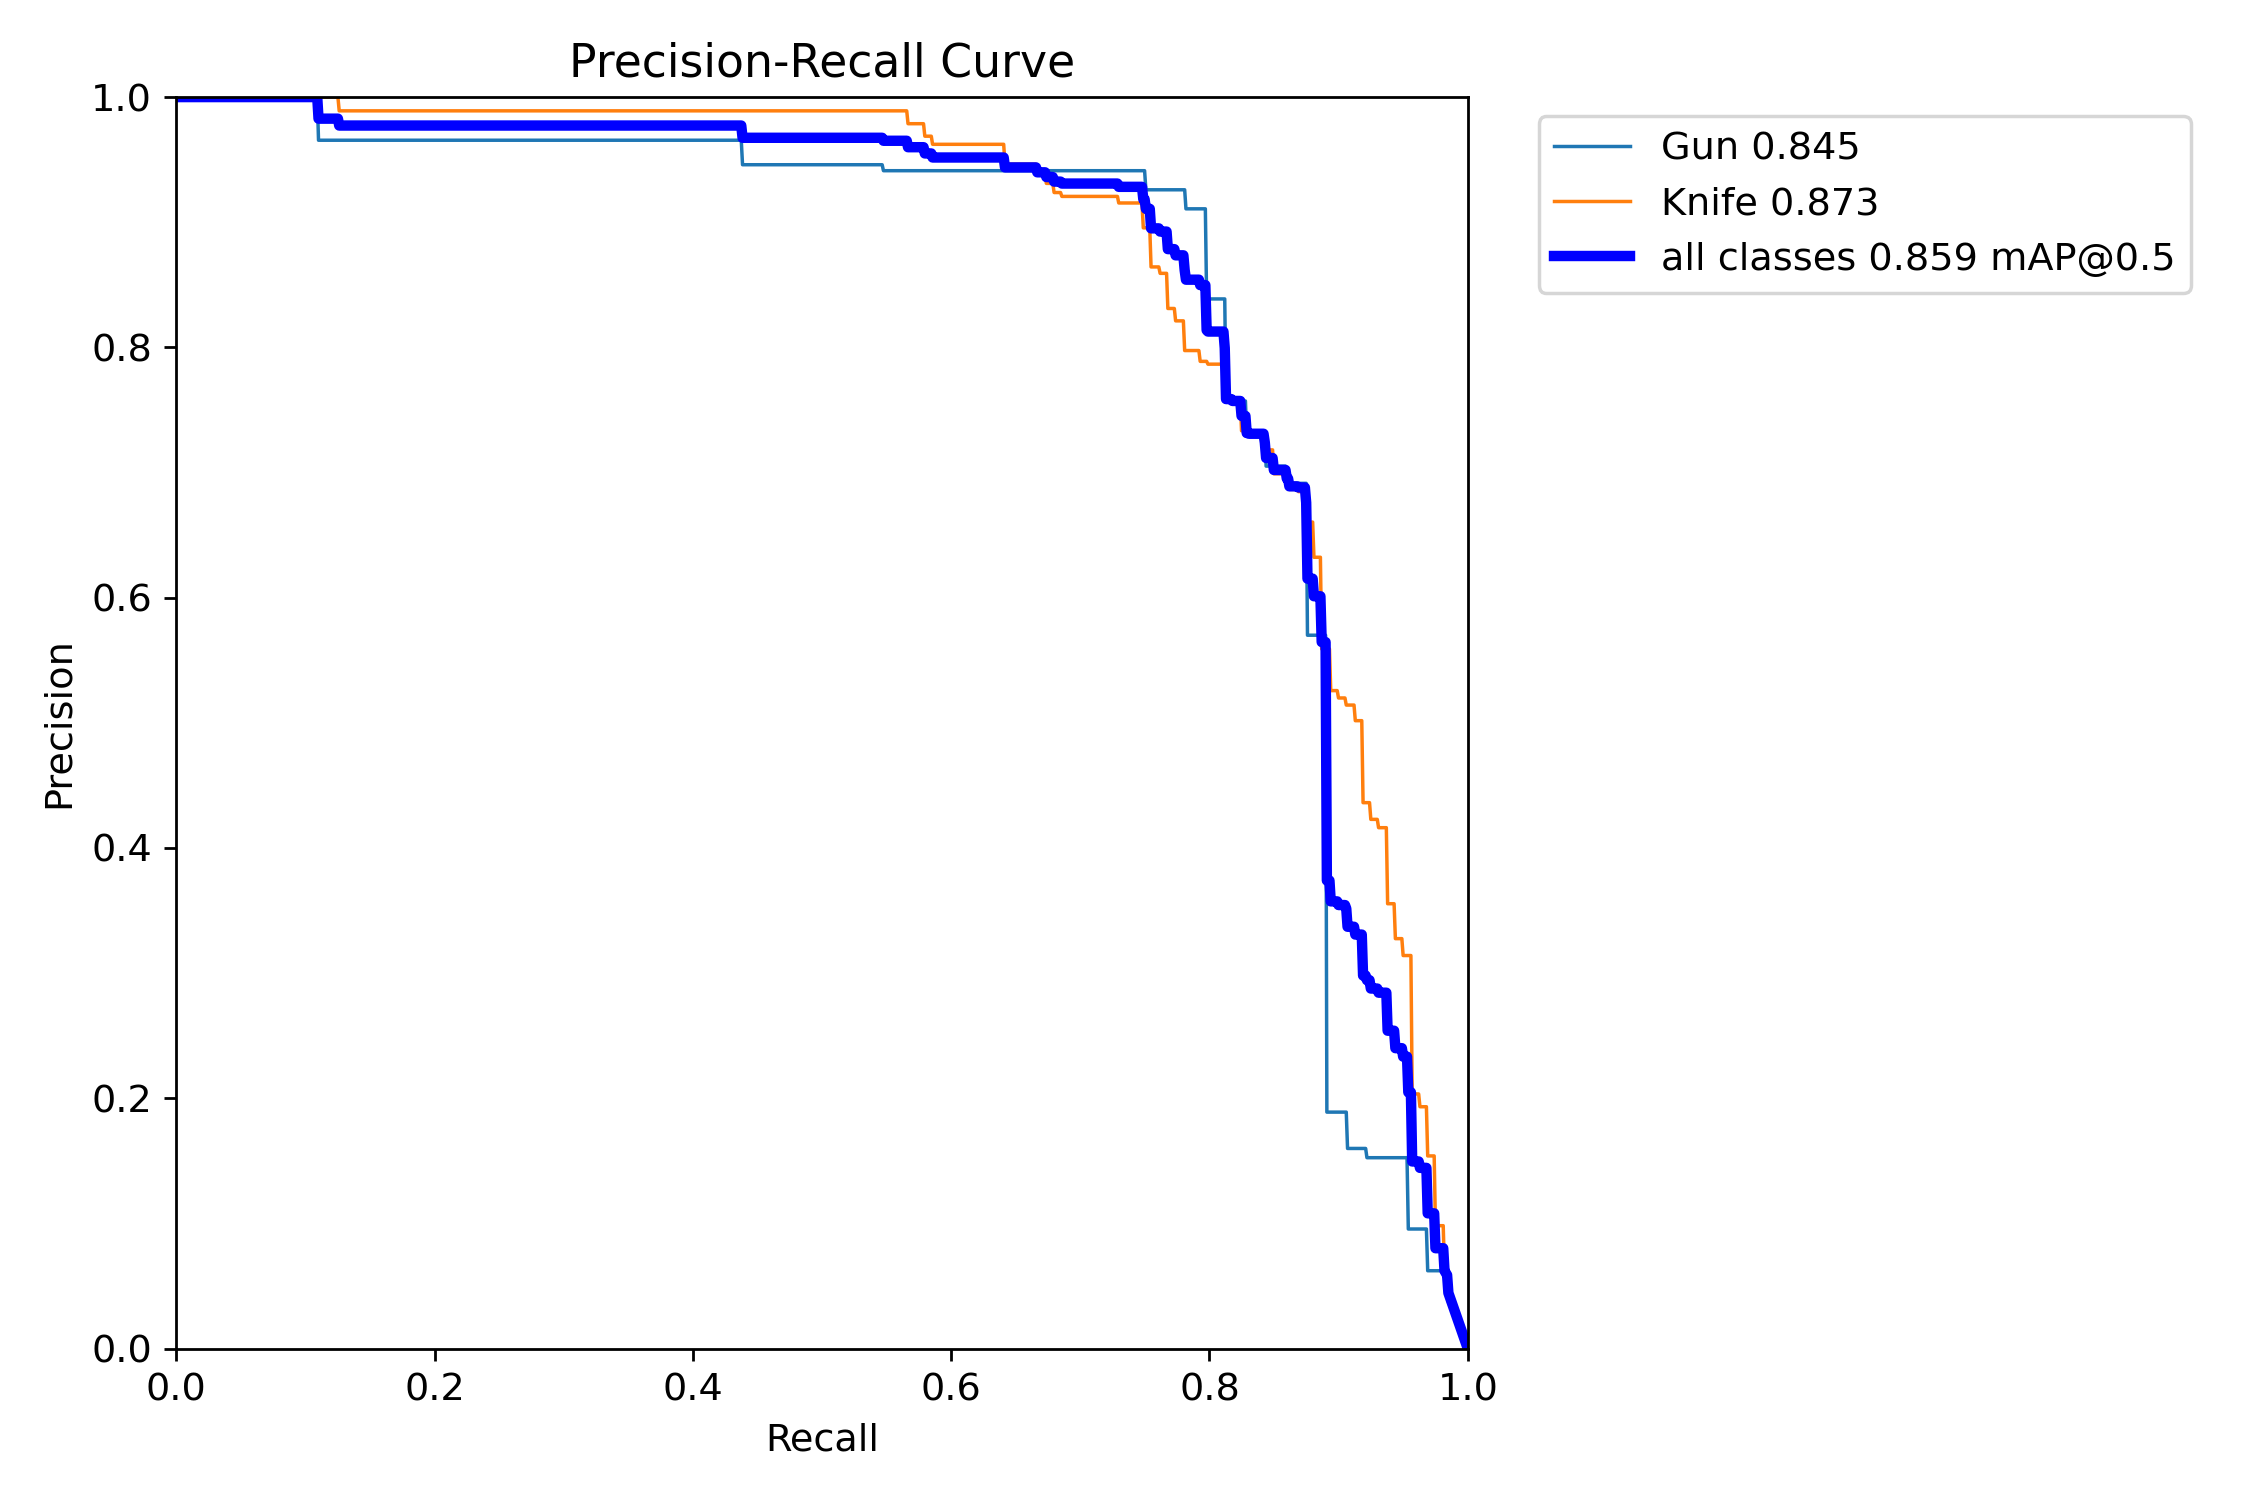

In [25]:
Image(filename=f'/content/runs/detect/train/PR_curve.png', width=600)

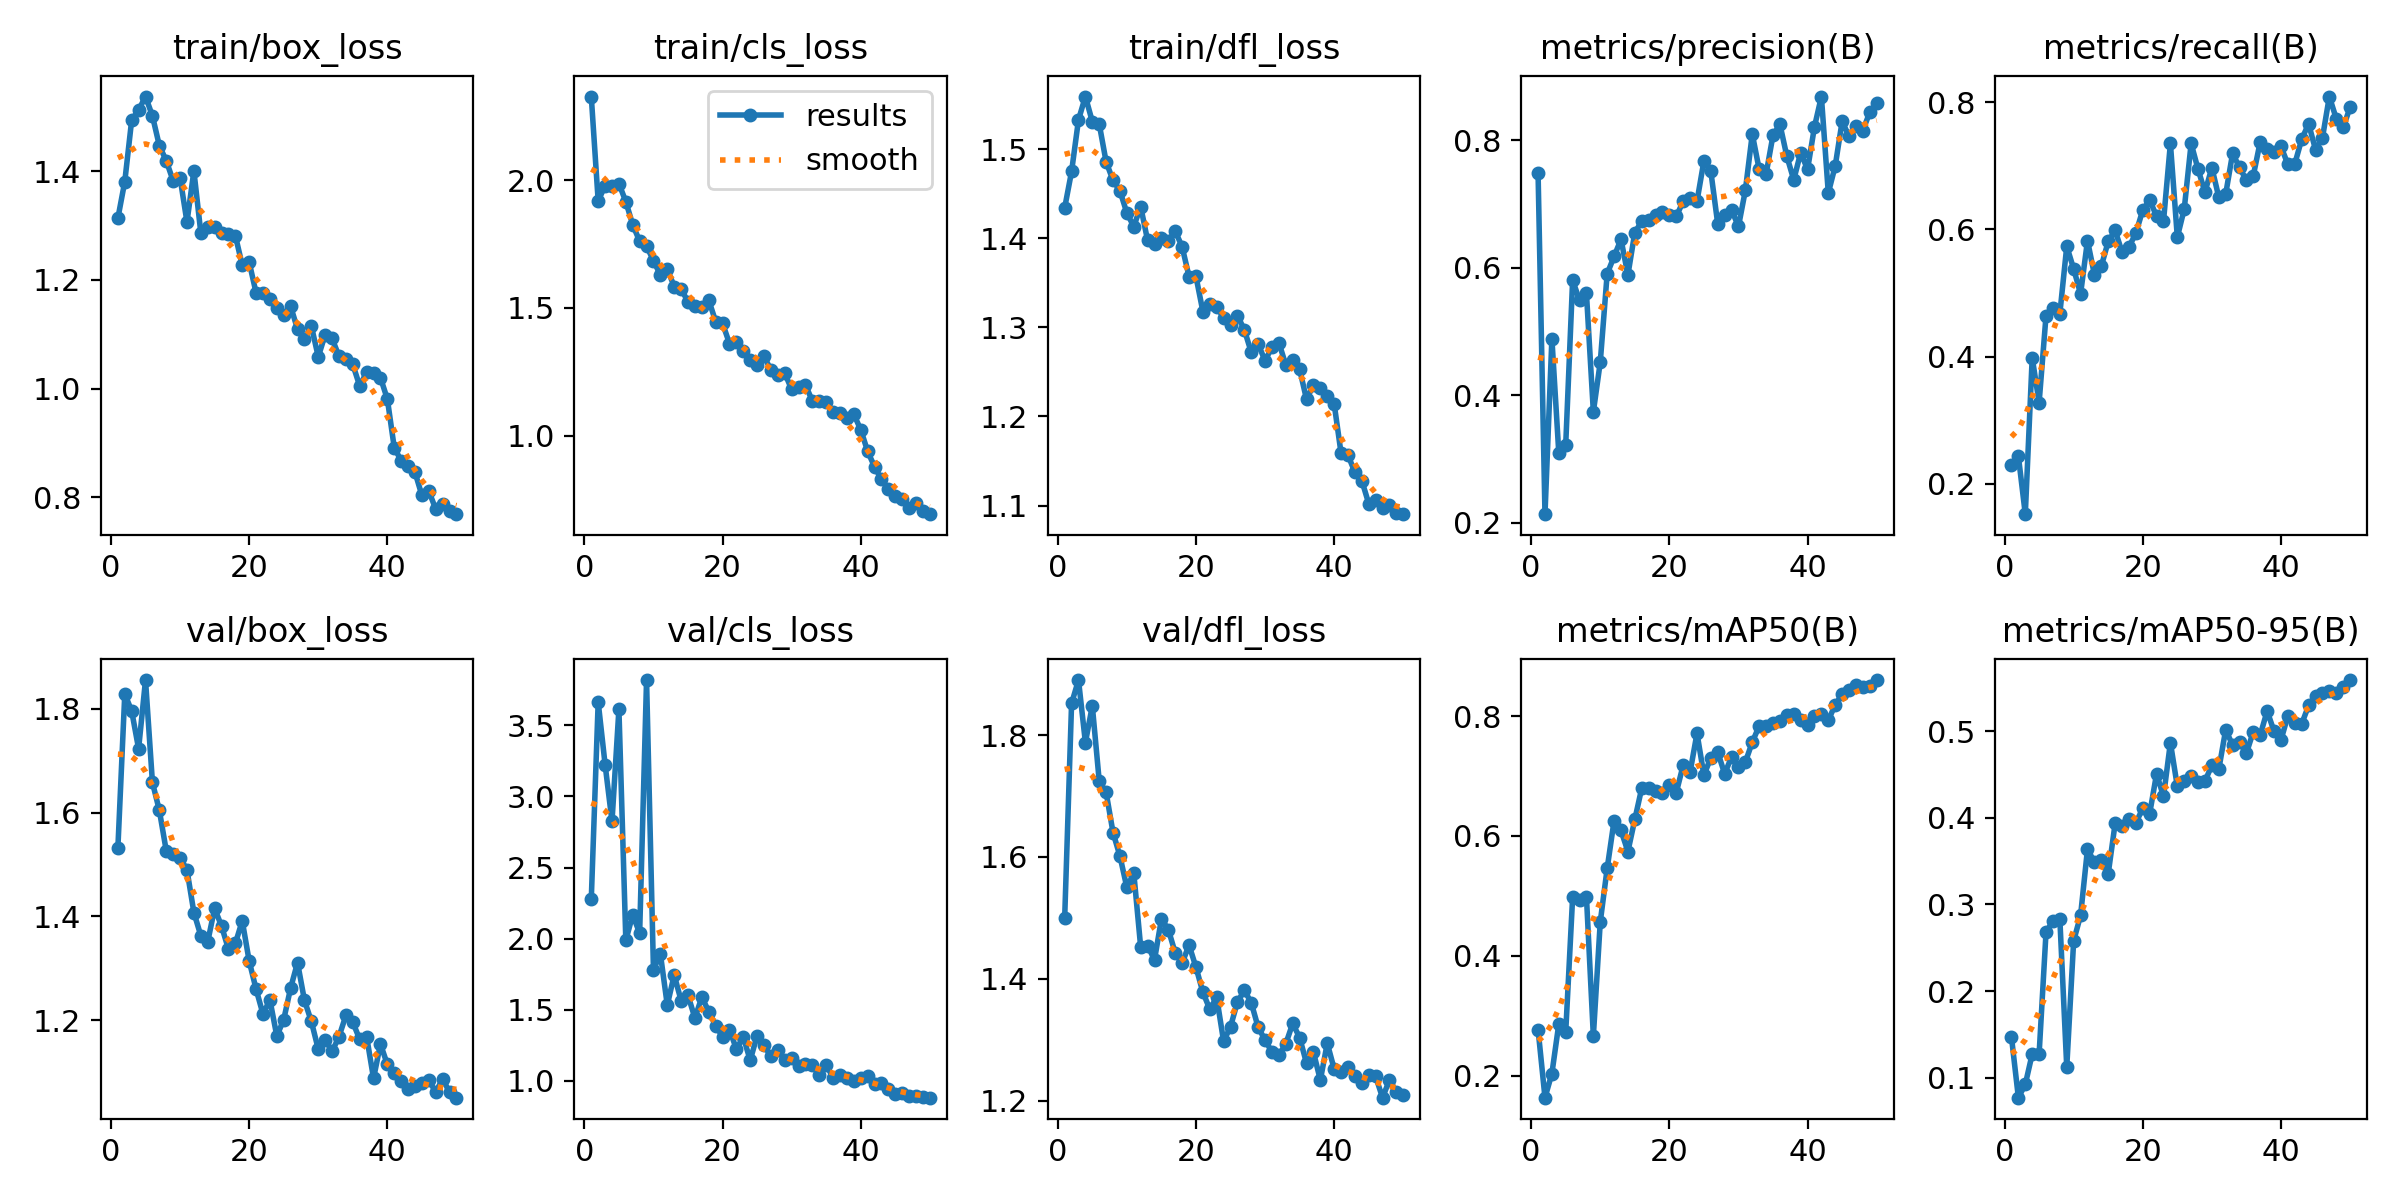

In [27]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [28]:
import csv

file_path = '/content/runs/detect/train/results.csv'

# Read and print CSV file
with open(file_path, 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        print(row)

['                  epoch', '         train/box_loss', '         train/cls_loss', '         train/dfl_loss', '   metrics/precision(B)', '      metrics/recall(B)', '       metrics/mAP50(B)', '    metrics/mAP50-95(B)', '           val/box_loss', '           val/cls_loss', '           val/dfl_loss', '                 lr/pg0', '                 lr/pg1', '                 lr/pg2']
['                      1', '                 1.3135', '                 2.3275', '                 1.4341', '                0.74833', '                0.22956', '                0.27719', '                0.14677', '                 1.5317', '                 2.2764', '                 1.4994', '              0.0005467', '              0.0005467', '              0.0005467']
['                      2', '                 1.3811', '                 1.9184', '                  1.475', '                0.21377', '                0.24356', '                0.16349', '                0.07684', '                 1.8283'

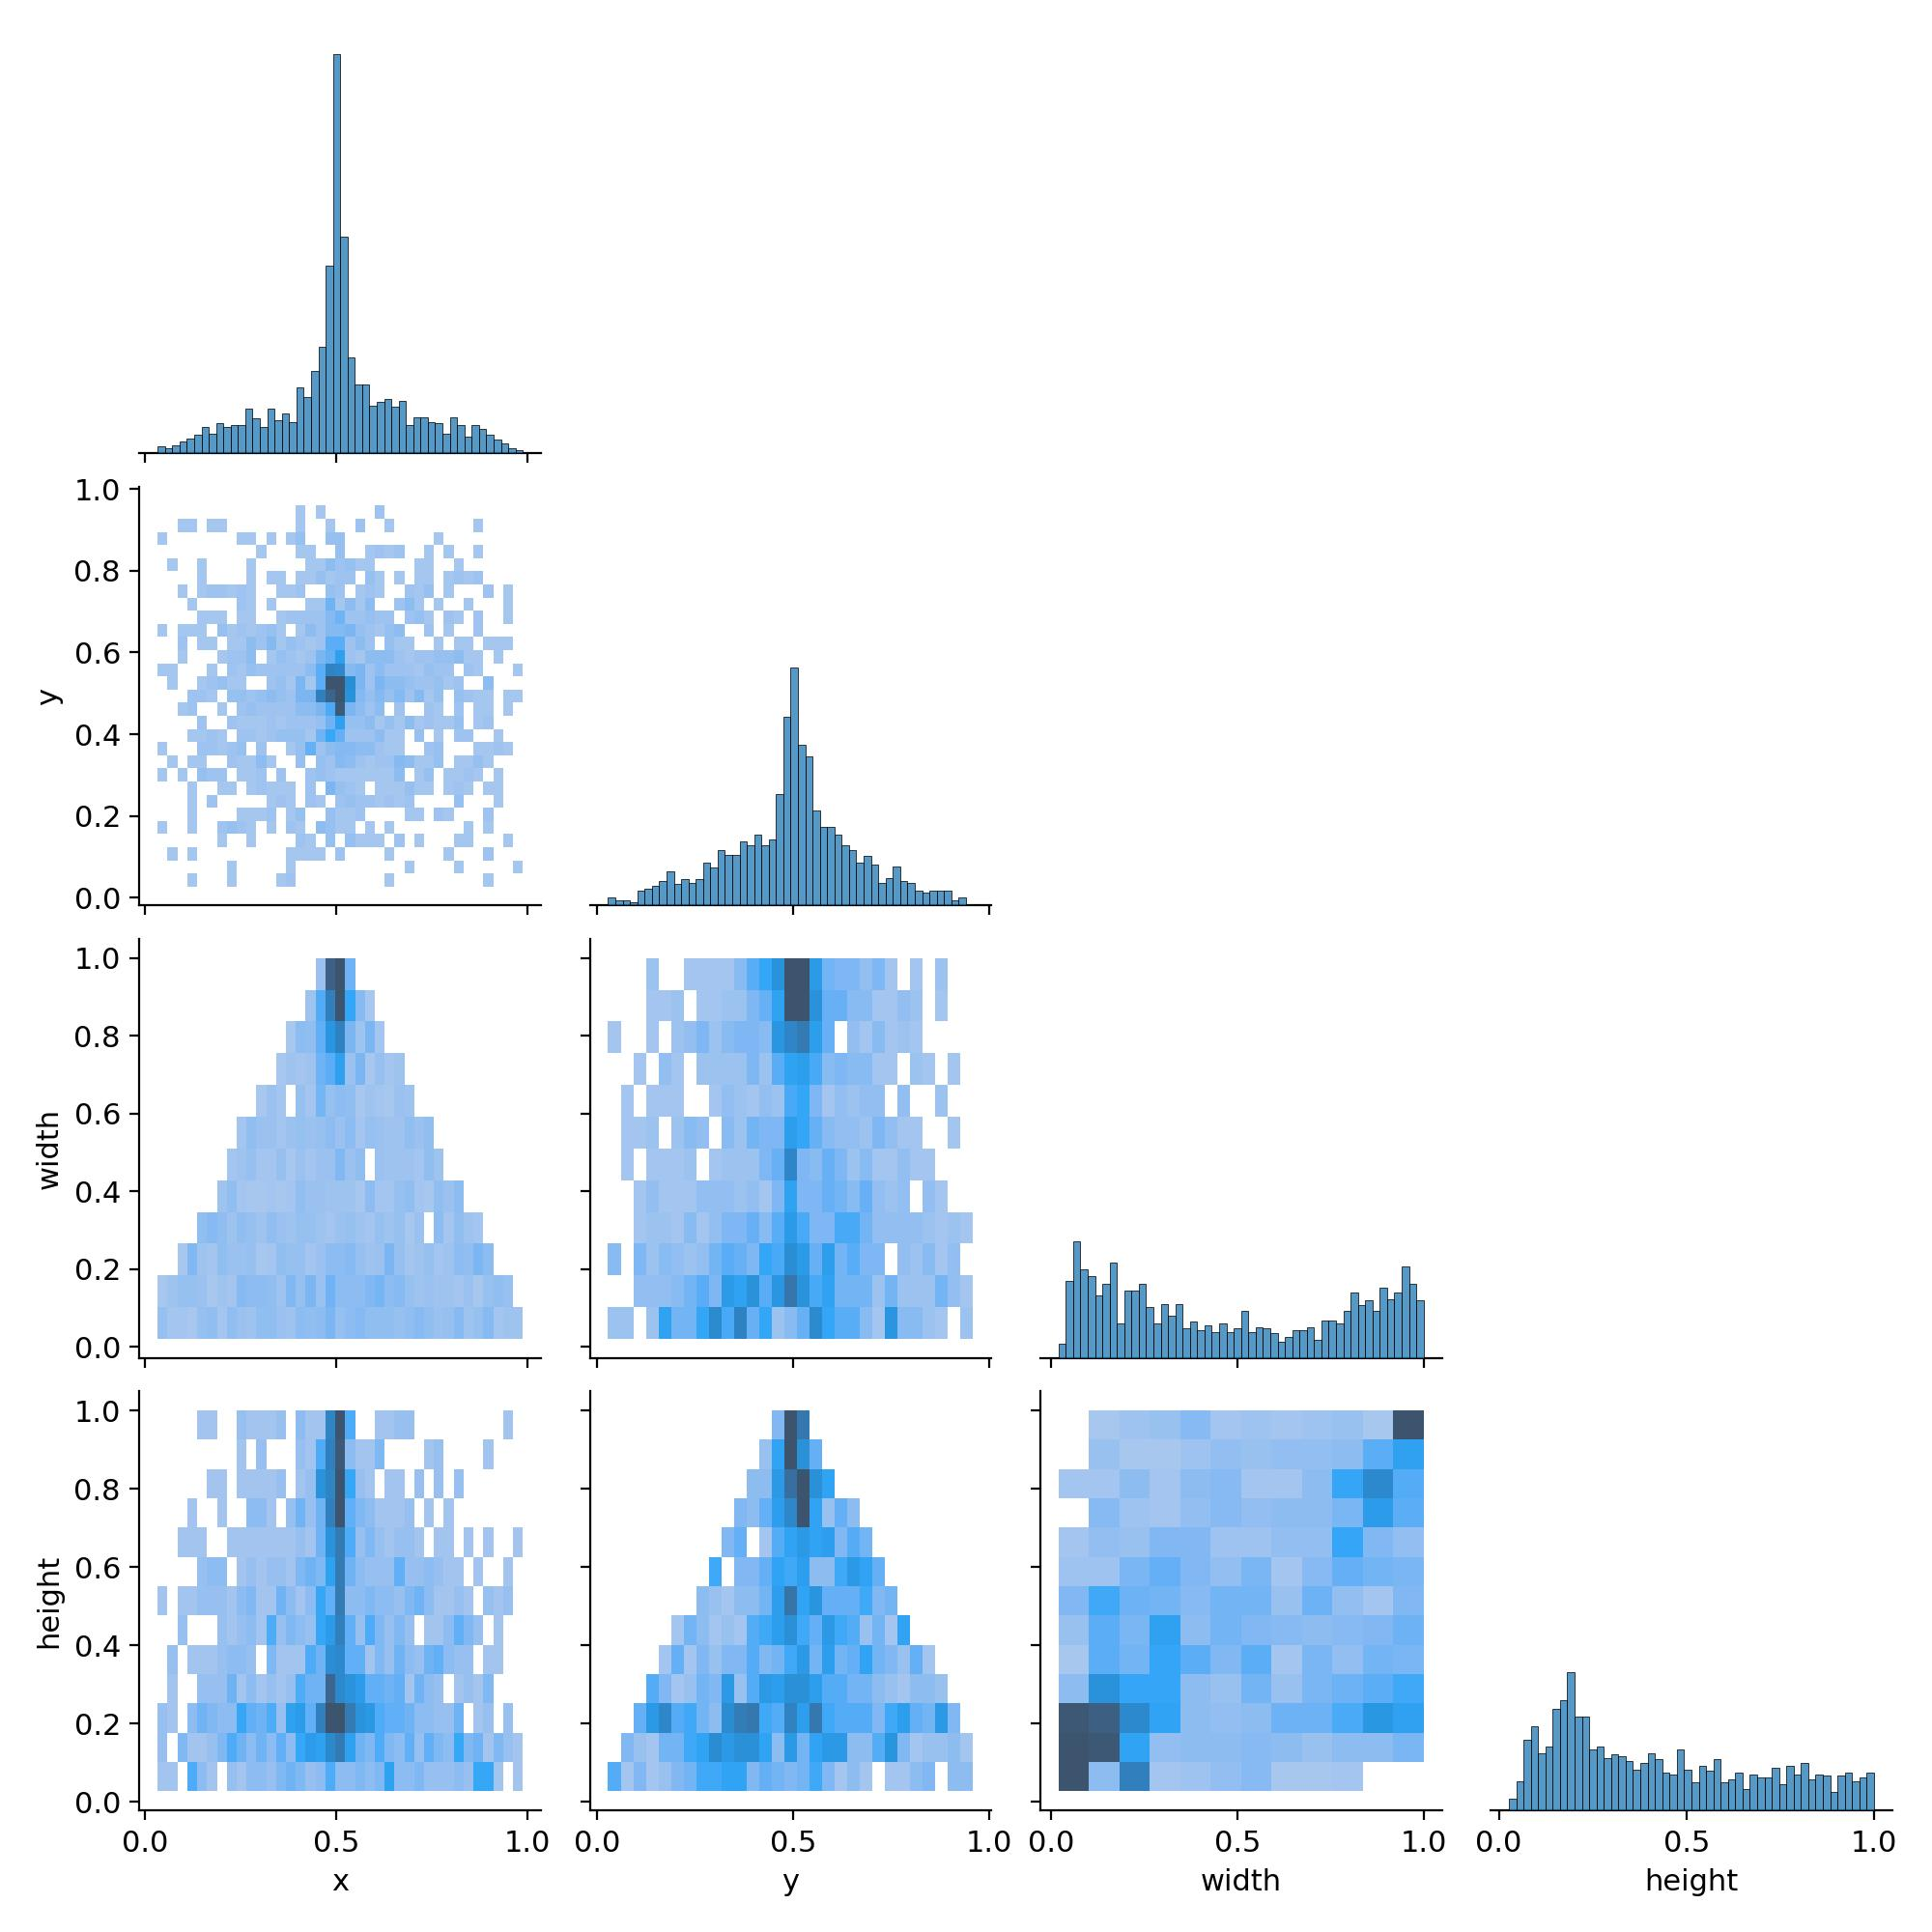

In [29]:
Image(filename=f'/content/runs/detect/train/labels_correlogram.jpg', width=600)